In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("../data/heart_disease_clean.csv")
X = df.drop(columns=['target'])
y = df['target']

In [3]:
X_scaled = StandardScaler().fit_transform(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

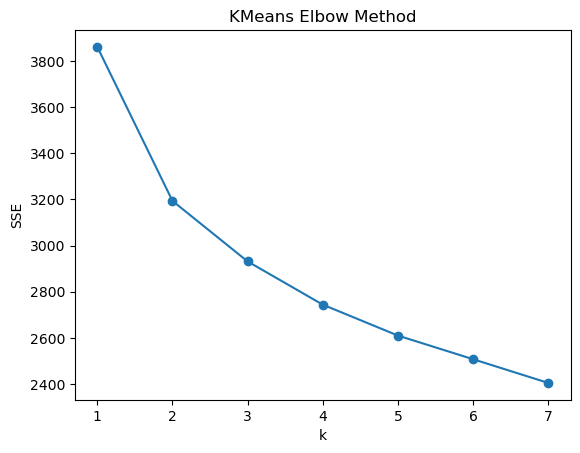

In [4]:
sse = []
for k in range(1,8):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(range(1,8), sse, marker='o')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("KMeans Elbow Method")
plt.show()

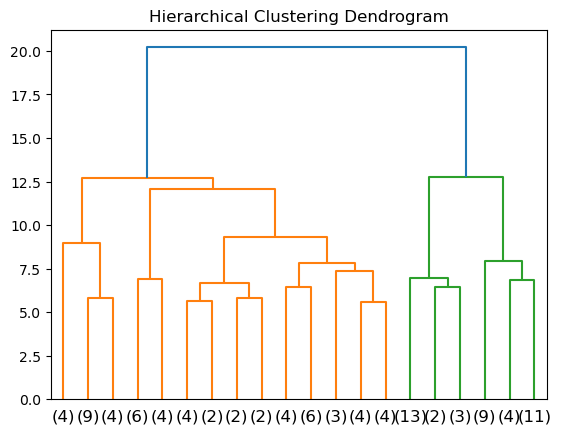

In [5]:
Z = linkage(X_scaled[:100], method='ward')  # subset for speed
dendrogram(Z, truncate_mode="lastp", p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()